In [1]:
# Core libraries for this tutorial
# Available via `pip install zarr zarr-eosdis-store`
from eosdis_store import EosdisStore
import xarray as xr

# Other Python libraries
import requests
from pqdm.threads import pqdm
from matplotlib import animation, pyplot as plt
from IPython.core.display import display, HTML

# Python standard library imports
from pprint import pprint

In [2]:
plt.rcParams['figure.figsize'] = 12, 6

In [87]:
data_provider = 'POCLOUD'
mur_short_name = 'MUR-JPL-L4-GLOB-v4.1'

#mur_short_name = 'CMC0.1deg-CMC-L4-GLOB-v3.0'
 

In [88]:
start_time = '2020-09-01T21:00:00Z'
end_time = '2020-09-30T20:59:59Z'

# Bounding box around the Great Lakes
lats = slice(41, 49)
lons = slice(-93, -76)

# Some other possibly interesting bounding boxes:

# Hawaiian Islands
# lats = slice(18, 22.5)
# lons = slice(-161, -154)

# Mediterranean Sea
# lats = slice(29, 45)
# lons = slice(-7, 37)

# West coast
lats = slice(40, 60)
lons = slice(-145, -120)

In [89]:
cmr_url = 'https://cmr.earthdata.nasa.gov/search/granules.json'

In [90]:
response = requests.get(cmr_url, 
                        params={
                            'provider': data_provider,
                            'short_name': mur_short_name, 
                            'temporal': f'{start_time},{end_time}',
                            'bounding_box': f'{lons.start},{lats.start},{lons.stop},{lats.stop}',
                            'page_size': 2000,
                            }
                       )
response

<Response [200]>

In [91]:
granules = response.json()['feed']['entry']

for granule in granules:
    print(granule['title'])

20200901090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1
20200902090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1
20200903090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1
20200904090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1
20200905090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1
20200906090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1
20200907090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1
20200908090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1
20200909090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1
20200910090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1
20200911090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1
20200912090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1
20200913090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1
20200914090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1
20200915090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1
20200916090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1
20200917090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1
20200918090000

In [92]:
pprint(granules[0])

{'boxes': ['-90 -180 90 180'],
 'browse_flag': False,
 'collection_concept_id': 'C1996881146-POCLOUD',
 'coordinate_system': 'CARTESIAN',
 'data_center': 'POCLOUD',
 'dataset_id': 'GHRSST Level 4 MUR Global Foundation Sea Surface Temperature '
               'Analysis (v4.1)',
 'day_night_flag': 'UNSPECIFIED',
 'granule_size': '687.7537326812744',
 'id': 'G2028242859-POCLOUD',
 'links': [{'href': 's3://podaac-ops-cumulus-protected/MUR-JPL-L4-GLOB-v4.1/20200901090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
            'hreflang': 'en-US',
            'rel': 'http://esipfed.org/ns/fedsearch/1.1/s3#',
            'title': 'This link provides direct download access via S3 to the '
                     'granule.'},
           {'href': 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/MUR-JPL-L4-GLOB-v4.1/20200901090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
            'hreflang': 'en-US',
            'rel': 'http://esipfed.org/ns/fedsearch/1.1/data#',

In [93]:
urls = []
for granule in granules:
    for link in granule['links']:
        if link['rel'].endswith('/data#'):
            urls.append(link['href'])
            break
pprint(urls)

['https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/MUR-JPL-L4-GLOB-v4.1/20200901090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/MUR-JPL-L4-GLOB-v4.1/20200902090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/MUR-JPL-L4-GLOB-v4.1/20200903090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/MUR-JPL-L4-GLOB-v4.1/20200904090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/MUR-JPL-L4-GLOB-v4.1/20200905090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/MUR-JPL-L4-GLOB-v4.1/20200906090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc',
 'https://archive.podaac.earthdata.nasa.gov/podaac-ops-cum

In [94]:
response = requests.get(f'{urls[0]}.dmrpp')

print('Can we use EosdisZarrStore and XArray to access these files more efficiently?')
print('Yes' if response.ok else 'No')

Can we use EosdisZarrStore and XArray to access these files more efficiently?
Yes


In [95]:
url = urls[0]

ds = xr.open_zarr(EosdisStore(url), consolidated=False)

In [96]:
ds

<xarray.Dataset>
Dimensions:           (time: 1, lat: 17999, lon: 36000)
Coordinates:
  * lat               (lat) float32 -89.99 -89.98 -89.97 ... 89.97 89.98 89.99
  * lon               (lon) float32 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * time              (time) datetime64[ns] 2020-09-01T09:00:00
Data variables:
    analysed_sst      (time, lat, lon) float32 dask.array<chunksize=(1, 1023, 2047), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 dask.array<chunksize=(1, 1023, 2047), meta=np.ndarray>
    dt_1km_data       (time, lat, lon) timedelta64[ns] dask.array<chunksize=(1, 1447, 2895), meta=np.ndarray>
    mask              (time, lat, lon) float32 dask.array<chunksize=(1, 1447, 2895), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 dask.array<chunksize=(1, 1447, 2895), meta=np.ndarray>
    sst_anomaly       (time, lat, lon) float32 dask.array<chunksize=(1, 1023, 2047), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.7
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:                Jet Propulsion Laboratory
    history:                    created at nominal 4-day latency; replaced nr...
    ...                         ...
    project:                    NASA Making Earth Science Data Records for Us...
    publisher_name:             GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L4
    cdm_data_type:              grid

In [97]:
ds.analysed_sst

<xarray.DataArray 'analysed_sst' (time: 1, lat: 17999, lon: 36000)>
dask.array<open_dataset-b7287e85fa43d4db0d919ce2ed2af25eanalysed_sst, shape=(1, 17999, 36000), dtype=float32, chunksize=(1, 1023, 2047), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -89.99 -89.98 -89.97 -89.96 ... 89.97 89.98 89.99
  * lon      (lon) float32 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * time     (time) datetime64[ns] 2020-09-01T09:00:00
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_min:      -32767
    valid_max:      32767
    comment:        \"Final\" version using Multi-Resolution Variational Anal...
    source:         MODIS_T-JPL, MODIS_A-JPL, AMSR2-REMSS, AVHRRMTA_G-NAVO, A...

In [98]:
sst = ds.analysed_sst.sel(lat=lats, lon=lons)
sst

<xarray.DataArray 'analysed_sst' (time: 1, lat: 2001, lon: 2501)>
dask.array<getitem, shape=(1, 2001, 2501), dtype=float32, chunksize=(1, 1023, 1906), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 40.0 40.01 40.02 40.03 ... 59.97 59.98 59.99 60.0
  * lon      (lon) float32 -145.0 -145.0 -145.0 -145.0 ... -120.0 -120.0 -120.0
  * time     (time) datetime64[ns] 2020-09-01T09:00:00
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_min:      -32767
    valid_max:      32767
    comment:        \"Final\" version using Multi-Resolution Variational Anal...
    source:         MODIS_T-JPL, MODIS_A-JPL, AMSR2-REMSS, AVHRRMTA_G-NAVO, A...

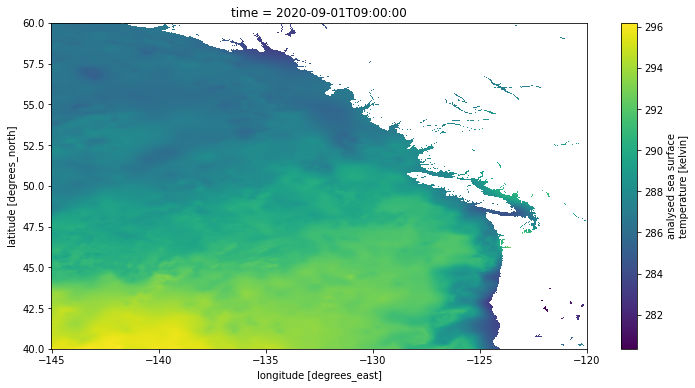

In [99]:
sst.plot()

In [100]:
def open_as_zarr_xarray(url):
    return xr.open_zarr(EosdisStore(url), consolidated=False)

datasets = pqdm(urls, open_as_zarr_xarray, n_jobs=30)

SUBMITTING | :   0%|          | 0/30 [00:00<?, ?it/s]

PROCESSING | :   0%|          | 0/30 [00:00<?, ?it/s]

COLLECTING | :   0%|          | 0/30 [00:00<?, ?it/s]

In [101]:
ds = xr.concat(datasets, 'time')
ds

<xarray.Dataset>
Dimensions:           (time: 30, lat: 17999, lon: 36000)
Coordinates:
  * lat               (lat) float32 -89.99 -89.98 -89.97 ... 89.97 89.98 89.99
  * lon               (lon) float32 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * time              (time) datetime64[ns] 2020-09-01T09:00:00 ... 2020-09-3...
Data variables:
    analysed_sst      (time, lat, lon) float32 dask.array<chunksize=(1, 1023, 2047), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 dask.array<chunksize=(1, 1023, 2047), meta=np.ndarray>
    dt_1km_data       (time, lat, lon) timedelta64[ns] dask.array<chunksize=(1, 1447, 2895), meta=np.ndarray>
    mask              (time, lat, lon) float32 dask.array<chunksize=(1, 1447, 2895), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 dask.array<chunksize=(1, 1447, 2895), meta=np.ndarray>
    sst_anomaly       (time, lat, lon) float32 dask.array<chunksize=(1, 1023, 2047), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.7
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:                Jet Propulsion Laboratory
    history:                    created at nominal 4-day latency; replaced nr...
    ...                         ...
    project:                    NASA Making Earth Science Data Records for Us...
    publisher_name:             GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L4
    cdm_data_type:              grid

In [102]:
ds = xr.concat(datasets, 'time')
ds

<xarray.Dataset>
Dimensions:           (time: 30, lat: 17999, lon: 36000)
Coordinates:
  * lat               (lat) float32 -89.99 -89.98 -89.97 ... 89.97 89.98 89.99
  * lon               (lon) float32 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * time              (time) datetime64[ns] 2020-09-01T09:00:00 ... 2020-09-3...
Data variables:
    analysed_sst      (time, lat, lon) float32 dask.array<chunksize=(1, 1023, 2047), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 dask.array<chunksize=(1, 1023, 2047), meta=np.ndarray>
    dt_1km_data       (time, lat, lon) timedelta64[ns] dask.array<chunksize=(1, 1447, 2895), meta=np.ndarray>
    mask              (time, lat, lon) float32 dask.array<chunksize=(1, 1447, 2895), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 dask.array<chunksize=(1, 1447, 2895), meta=np.ndarray>
    sst_anomaly       (time, lat, lon) float32 dask.array<chunksize=(1, 1023, 2047), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                CF-1.7
    title:                      Daily MUR SST, Final product
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    institution:                Jet Propulsion Laboratory
    history:                    created at nominal 4-day latency; replaced nr...
    ...                         ...
    project:                    NASA Making Earth Science Data Records for Us...
    publisher_name:             GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    publisher_email:            ghrsst-po@nceo.ac.uk
    processing_level:           L4
    cdm_data_type:              grid

In [103]:
sst = ds.analysed_sst.sel(lat=lats, lon=lons)
sst

<xarray.DataArray 'analysed_sst' (time: 30, lat: 2001, lon: 2501)>
dask.array<getitem, shape=(30, 2001, 2501), dtype=float32, chunksize=(1, 1023, 1906), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 40.0 40.01 40.02 40.03 ... 59.97 59.98 59.99 60.0
  * lon      (lon) float32 -145.0 -145.0 -145.0 -145.0 ... -120.0 -120.0 -120.0
  * time     (time) datetime64[ns] 2020-09-01T09:00:00 ... 2020-09-30T09:00:00
Attributes:
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_min:      -32767
    valid_max:      32767
    comment:        \"Final\" version using Multi-Resolution Variational Anal...
    source:         MODIS_T-JPL, MODIS_A-JPL, AMSR2-REMSS, AVHRRMTA_G-NAVO, A...

In [104]:
sst.load();

In [105]:
sst_min = sst.min()
sst_max = sst.max()

def show_time_step(i):
    plt.clf()
    res = sst[i].plot.imshow(vmin=sst_min, vmax=sst_max)
    return (res,)

In [106]:
anim = animation.FuncAnimation(plt.gcf(), func=show_time_step, frames=len(sst))
display(HTML(anim.to_jshtml()))
plt.close()